# Numerical Distance Metrics

### Exploring the data in the wine.data file. It contains a set of chemical measurements describing the properties of different kinds of wines, and the quality level 

In [15]:
import pandas as pd
df = pd.read_csv("wine.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Parse the column names from the dataset description file wine.names

#### Generate a regular expression that will match a column name (using a pattern where a number followed by a parenthesis has a column name after it

In [24]:
import re
expr = re.compile('.*[0-9]+\)\s?(\w+).*')

#### Create an array where the first element is the class label of the wine

In [25]:
header_names = ['Class']

In [26]:
df_header = open("wine.names")

#### Iterating through the lines in the file, we extract those that match our regular expression

In [29]:
for l in df_header.readlines():
    if len(expr.findall(l.strip()))!=0:
        header_names.append(expr.findall(l.strip())[0])
        df_header.close()

#### Assign this list to the dataframe columns property, which contains the names of the columns

In [30]:
df.columns = header_names

In [31]:
df.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Total,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
df.describe() 

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Total,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Normalize the columns so that they fall into the same numerical range 

In [33]:
from sklearn import preprocessing
df_normalized = pd.DataFrame(preprocessing.scale(df[header_names[1:]]))
df_normalized.columns = header_names[1:]
df_normalized.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Total,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


#### Calculate Euclidean distances between the rows 

In [34]:
import sklearn.metrics.pairwise as pairwise
distances = pairwise.euclidean_distances(df_normalized)

In [35]:
distances

array([[ 0.        ,  3.49753522,  3.02660794, ...,  6.4909413 ,
         6.07878091,  7.18442107],
       [ 3.49753522,  0.        ,  4.1429119 , ...,  6.39689969,
         6.09492714,  7.36771922],
       [ 3.02660794,  4.1429119 ,  0.        , ...,  6.25367723,
         5.85179331,  6.35388503],
       ..., 
       [ 6.4909413 ,  6.39689969,  6.25367723, ...,  0.        ,
         1.82621785,  3.39251526],
       [ 6.07878091,  6.09492714,  5.85179331, ...,  1.82621785,
         0.        ,  3.32427633],
       [ 7.18442107,  7.36771922,  6.35388503, ...,  3.39251526,
         3.32427633,  0.        ]])

### Verifying the previous command produces a same length of matrix

In [36]:
distances.shape

(178L, 178L)

## Use multidimensional scaling (MDS) - plot the results using the wine class to color points in the diagram

In [41]:
import matplotlib
matplotlib.style.use('ggplot')

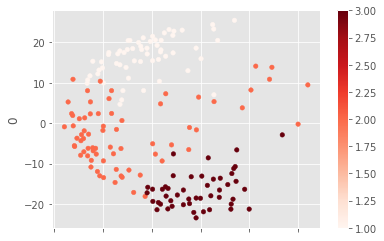

In [42]:
from sklearn.manifold import MDS
% matplotlib inline
mds_coords = MDS().fit_transform(distances)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0,color=df.Class[:],colormap='Reds')